In [27]:
import numpy as np
import h5py
from matplotlib import pyplot as plt

## Loading and inspecting the MNISTLargeScale dataset

The MNISTLargeScale dataset is a variation of the standard MNIST dataset of handwritten digits
with large scale variations (a factor 16). The dataset was introduced in:

[1] Y. Jansson and T. Lindeberg (2020) “Exploring the ability of CNNs to generalise to previously unseen scales”, arXiv preprint arXiv:2004.01536.

and is derived from the original MNIST dataset:

[2] LeCun, Y., Bottou, L., & Haffner, P. (1998). “Gradient-based learning applied to document recognition”. Proceedings of the IEEE, 86(11), 2278–2324

The dataset is freely available at DOI: 10.5281/zenodo.3820247. 

We here provide, for convenience, Matlab and Python scripts for reading the dataset and plotting some images.
See DOI: 10.5281/zenodo.3820247 and [1] for additional information about the dataset and benchmark results.

In [28]:
def load_mnist_h5_tr_te_val(n_train, n_test, n_val, filename, 
                    path):
    """Data will be in format [n_samples, width, height, n_channels] """
    
    with h5py.File(path + filename, 'r') as f:    
        # Data should be floating point
        x_train = np.array( f["/x_train"], dtype=np.float32)
        x_test = np.array( f["/x_test"], dtype=np.float32)
        x_val= np.array( f["/x_val"], dtype=np.float32)

        # Labels should normally be integers
        y_train = np.array( f["/y_train"], dtype=np.int32)
        y_test = np.array( f["/y_test"], dtype=np.int32)
        y_val= np.array( f["/y_val"], dtype=np.int32)
        
        # Labels should normally be 1D vectors, shape (n_labels,) 
        y_train = np.reshape(y_train,(np.size(y_train),))
        y_test = np.reshape(y_test,(np.size(y_test),))
        y_val = np.reshape(y_val,(np.size(y_val),))
        
    # Handle case of data containing only a single sample
    # (which is the case for the train and validation partitions in the "testdata only" datasets)
    if len(np.shape(x_train)) == 3:
        x_train = np.expand_dims(x_train, 0)
    if len(np.shape(x_test)) == 3:
            x_test = np.expand_dims(x_test, 0)
    if len(np.shape(x_val)) == 3:
        x_val = np.expand_dims(x_val, 0)    
        
    # Possibly use a different number of samples than in the datasetfile
    x_train = x_train[0:n_train]
    x_test = x_test[0:n_test]
    x_val = x_val[0:n_val]

    y_train = y_train[0:n_train]
    y_test = y_test[0:n_test]
    y_val = y_val[0:n_val]
    
    assert np.shape(x_train)[0] == n_train
    assert np.shape(x_test)[0] == n_test
    assert np.shape(x_val)[0] == n_val

    assert np.shape(y_train)[0] == n_train
    assert np.shape(y_test)[0] == n_test
    assert np.shape(y_val)[0] == n_val
    
    return (x_train, y_train), (x_test, y_test), (x_val, y_val)

### Load one of the training datasets

In [31]:
path = '<add_path>'

# This specific dataset contains scale variations in the range [1,4] relative the original MNIST dataset
filename = 'mnist_large_scale_tr50000_vl10000_te10000_outsize112-112_sctr1p000-4p000_scte1p000-4p000.h5'

n_train = 50000
n_val = 10000
n_test = 10000

(x_train, y_train), (x_test, y_test), (x_val, y_val) = load_mnist_h5_tr_te_val(
                                                             n_train, n_test, n_val, 
                                                             filename, path)
print("Shape training data:\t", np.shape(x_train))
print("Shape testing data:\t", np.shape(x_test))
print("Shape validation data:\t", np.shape(x_val))
print()
print("Shape training labels:\t", np.shape(y_train))
print("Shape test labels:\t", np.shape(y_test))
print("Shape validation labels: ", np.shape(y_val))
print()
print("Intensity range: [{:.2f}, {:.2f}] ".format(np.min(x_train), np.max(x_train)))

Shape training data:	 (50000, 112, 112, 1)
Shape testing data:	 (10000, 112, 112, 1)
Shape validation data:	 (10000, 112, 112, 1)

Shape training labels:	 (50000,)
Shape test labels:	 (10000,)
Shape validation labels:  (10000,)

Intensity range: [-0.76, 0.76] 


### Plot some of the images

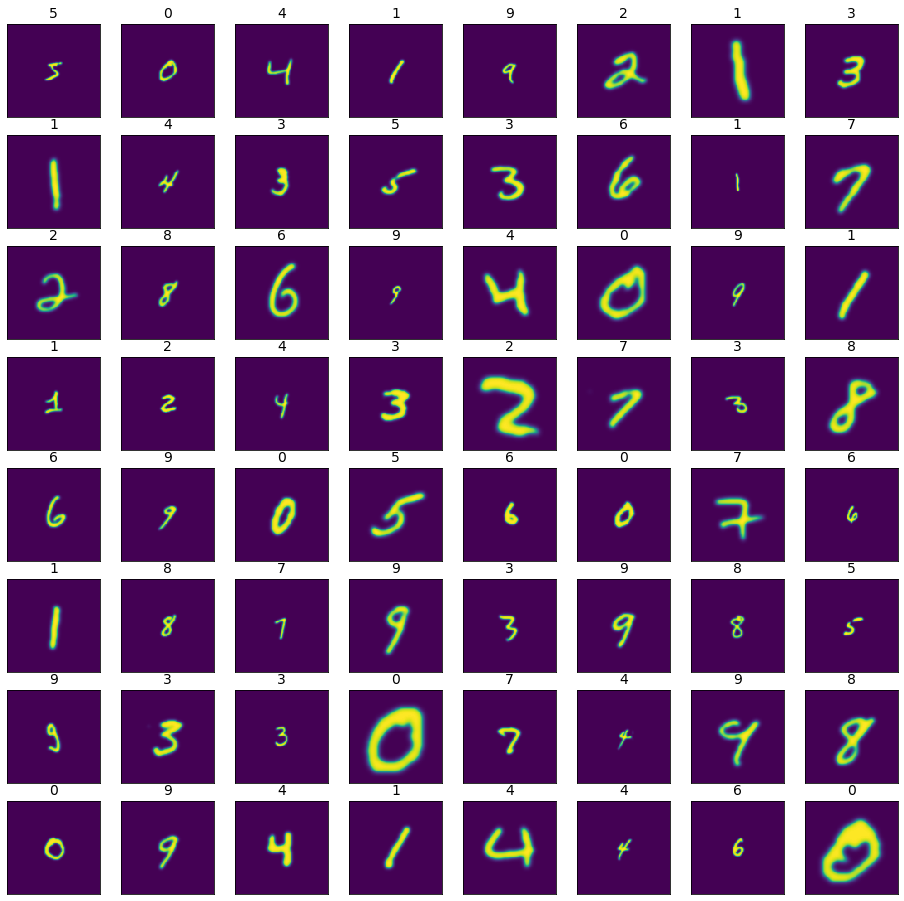

In [30]:
images = x_train
labels = y_train

fig, ax = plt.subplots(8, 8, figsize = [16,16])

nrows = 8
ncols = 8

for i in range(nrows):
    for j in range(ncols):
        ax[i][j].imshow(images[i*ncols+j, :, :, 0])
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
        ax[i][j].set_title(labels[i*8+j], fontsize=14)
    

### Load one of the testing datasets

In [37]:
scale = "2p000" # the scale of the digits in the test set, relative the original MNIST dataset

filename = 'mnist_large_scale_te10000_outsize112-112_scte{:s}.h5'.format(scale)

n_train = 1
n_val = 1
n_test = 10000

(x_train, y_train), (x_test, y_test), (x_val, y_val) = load_mnist_h5_tr_te_val(
                                                             n_train, n_test, n_val, 
                                                             filename, path)
print("Shape training data:\t", np.shape(x_train))
print("Shape testing data:\t", np.shape(x_test))
print("Shape validation data:\t", np.shape(x_val))
print()
print("Shape training labels:\t", np.shape(y_train))
print("Shape test labels:\t", np.shape(y_test))
print("Shape validation labels: ", np.shape(y_val))
print()
print("Intensity range: [{:.2f}, {:.2f}] ".format(np.min(x_train), np.max(x_train)))

Shape training data:	 (1, 112, 112, 1)
Shape testing data:	 (10000, 112, 112, 1)
Shape validation data:	 (1, 112, 112, 1)

Shape training labels:	 (1,)
Shape test labels:	 (10000,)
Shape validation labels:  (1,)

Intensity range: [-0.76, 0.76] 


### Plot some of the testing images

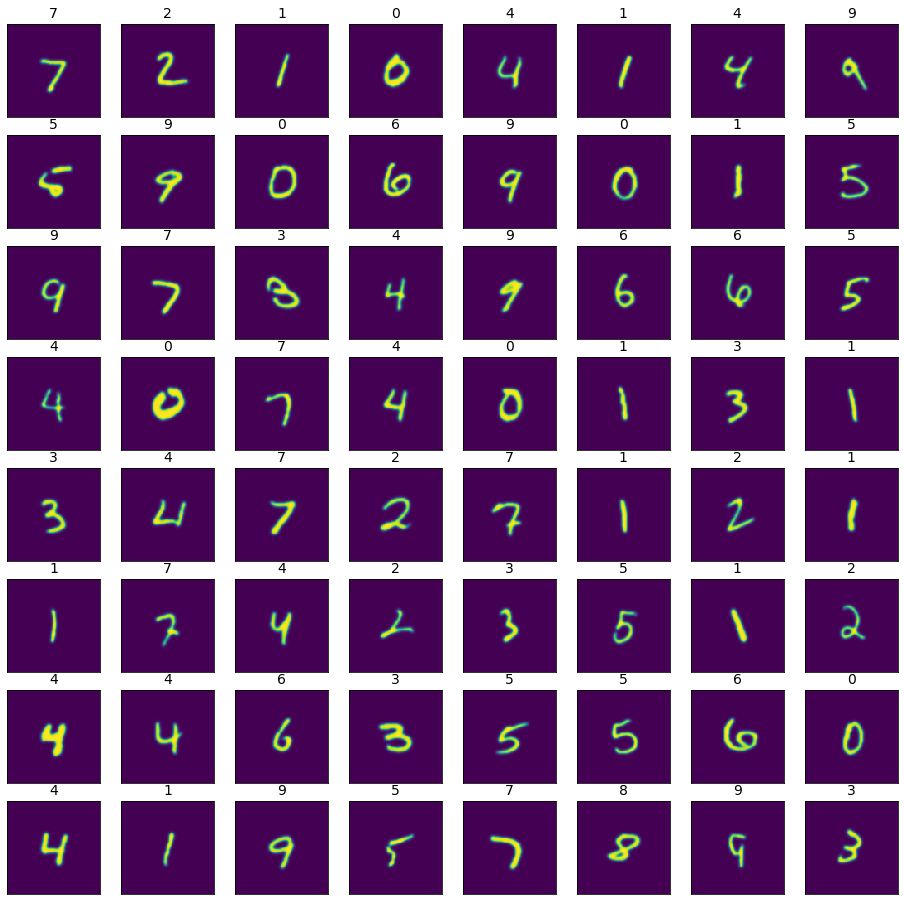

In [38]:
images = x_test
labels = y_test

fig, ax = plt.subplots(8, 8, figsize = [16,16])

nrows = 8
ncols = 8

for i in range(nrows):
    for j in range(ncols):
        ax[i][j].imshow(images[i*ncols+j, :, :, 0])
        ax[i][j].get_xaxis().set_visible(False)
        ax[i][j].get_yaxis().set_visible(False)
        ax[i][j].set_title(labels[i*8+j], fontsize=14)